# Chap.07 分類2：客船沈没事故の生存予測

In [43]:
# ライブラリーの準備
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
import pickle
%matplotlib inline


## 7.2 データの前処理

In [2]:
# 7-1 CSVファイルの読み込み
df = pd.read_csv('../support/datafiles/Survived.csv')
print(df.head(), "\n")
print(df.tail(), "\n")
df.shape

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S   

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch      Ticket  \
886          887         0       2    male  27.0      0      0      211536   
887          888         1       1  female  19.0      0      0      112053   
888          889         0       3  female   NaN      1      2  W./C. 6607   
889          890         

(891, 11)

In [3]:
# 7-2 「Survived」列のデータ
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [4]:
# 7-3 欠損値を確認する
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# 7-4 shapeでデータの行数と列数を確認する
df.shape

(891, 11)

In [8]:
# 7-5 「Age」列と「Embarked」列の穴埋めをする

# 「Age」列を平均値で穴埋めする
df['Age'] = df['Age'].fillna(df['Age'].mean())

# 「Embarked」列を最頻値で穴埋めする
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [10]:
# 7-6 特徴量xと正解データtに分割する
col = ['Pclass', 'Age', 'SibSp', "Parch", 'Fare']
x = df[col]
t = df['Survived']

In [12]:
# 7-7 訓練データとテストデータに分割する
x_train,x_test,y_train,y_test = train_test_split(
    x, t, test_size=0.2, random_state=0
)
print(x_train.shape, x_test.shape)

(712, 5) (179, 5)


## 7.3 モデルの作成と学習

In [13]:
# 7-8 モデルの作成と学習
model = tree.DecisionTreeClassifier(
    max_depth=5, random_state=0, class_weight='balanced'
)
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=0)

## 7.4 モデルの評価

In [14]:
# 7-9 決定木モデルの正解率を計算する
model.score(X = x_test, y = y_test)

0.7374301675977654

In [17]:
# 7-10 learn関数を定義する
def learn(x, t, depth=3):
    x_train, x_test, y_train, y_test = train_test_split(
        x, t, test_size=0.2, random_state=0
    )
    model = tree.DecisionTreeClassifier(
        max_depth=depth, random_state=0, class_weight='balanced'
    )
    model.fit(x_train, y_train)

    score = model.score(X=x_train, y=y_train)
    score2 = model.score(X=x_test, y=y_test)
    return round(score, 3), round(score2, 3), model

In [18]:
# 7-11 木の深さによる正解率の変化を確認する（2回目）
for j in range(1, 15):
    train_score, test_score, model = learn(x, t, depth=j)
    sentence = f"訓練データの正解率{train_score} "
    sentence2 = f"テストデータの正解率{test_score}"
    total_sentence = f"深さ{j} " + sentence + sentence2
    print(total_sentence)

深さ1 訓練データの正解率0.659 テストデータの正解率0.704
深さ2 訓練データの正解率0.699 テストデータの正解率0.732
深さ3 訓練データの正解率0.704 テストデータの正解率0.737
深さ4 訓練データの正解率0.698 テストデータの正解率0.726
深さ5 訓練データの正解率0.722 テストデータの正解率0.737
深さ6 訓練データの正解率0.77 テストデータの正解率0.698
深さ7 訓練データの正解率0.771 テストデータの正解率0.648
深さ8 訓練データの正解率0.781 テストデータの正解率0.631
深さ9 訓練データの正解率0.83 テストデータの正解率0.704
深さ10 訓練データの正解率0.851 テストデータの正解率0.687
深さ11 訓練データの正解率0.878 テストデータの正解率0.676
深さ12 訓練データの正解率0.892 テストデータの正解率0.654
深さ13 訓練データの正解率0.909 テストデータの正解率0.654
深さ14 訓練データの正解率0.92 テストデータの正解率0.654


In [19]:
# 7-12 「Age」列の平均値を中央値を確認する
df2 = pd.read_csv('../support/datafiles/Survived.csv')
print(df2['Age'].mean())
print(df2['Age'].median())

29.69911764705882
28.0


In [20]:
# 7-13 小グループ作成の基準となる列を指定する
df2.groupby('Survived').mean()['Age']

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [21]:
# 7-14「Pclass」列で集計する
df2.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [27]:
# 7-15 ピボットテーブル機能を使う
pd.pivot_table(df2, index='Survived', columns='Pclass', values='Age')

Pclass,1,2,3
Survived,,,
0,43.695312,33.544444,26.555556
1,35.368197,25.901566,20.646118


In [23]:
# 7-16 引数aggfuncを使って、平均値以外の統計量を求める
pd.pivot_table(df2, index='Survived', columns='Pclass', values='Age', aggfunc=max)

Pclass,1,2,3
Survived,,,
0,71.0,70.0,74.0
1,80.0,62.0,63.0


In [28]:
# 7-17 loc機能で「Age」列の欠損値を穴埋めする
is_null = df2['Age'].isnull()

# Pclass: 1
df2.loc[(df2['Pclass'] == 1) & (df2['Survived'] == 0) & (is_null), 'Age'] = 43
df2.loc[(df2['Pclass'] == 1) & (df2['Survived'] == 1) & (is_null), 'Age'] = 35
# Pclass: 2
df2.loc[(df2['Pclass'] == 2) & (df2['Survived'] == 0) & (is_null), 'Age'] = 33
df2.loc[(df2['Pclass'] == 2) & (df2['Survived'] == 1) & (is_null), 'Age'] = 25
# Pclass: 3
df2.loc[(df2['Pclass'] == 3) & (df2['Survived'] == 0) & (is_null), 'Age'] = 26
df2.loc[(df2['Pclass'] == 3) & (df2['Survived'] == 1) & (is_null), 'Age'] = 20

In [29]:
# 7-18 learn関数を使って、モデルを再学習させる（3回目）
col = ['Pclass', 'Age', 'SibSp', "Parch", 'Fare']
x = df2[col]
t = df2['Survived']

for j in range(1, 15):
    train_score, test_score, model = learn(x, t, depth=j)
    sentence = f"訓練データの正解率{train_score} "
    sentence2 = f"テストデータの正解率{test_score}"
    total_sentence = f"深さ{j} " + sentence + sentence2
    print(total_sentence)

深さ1 訓練データの正解率0.659 テストデータの正解率0.704
深さ2 訓練データの正解率0.699 テストデータの正解率0.67
深さ3 訓練データの正解率0.722 テストデータの正解率0.715
深さ4 訓練データの正解率0.74 テストデータの正解率0.704
深さ5 訓練データの正解率0.76 テストデータの正解率0.726
深さ6 訓練データの正解率0.794 テストデータの正解率0.793
深さ7 訓練データの正解率0.819 テストデータの正解率0.749
深さ8 訓練データの正解率0.84 テストデータの正解率0.749
深さ9 訓練データの正解率0.885 テストデータの正解率0.743
深さ10 訓練データの正解率0.906 テストデータの正解率0.732
深さ11 訓練データの正解率0.93 テストデータの正解率0.726
深さ12 訓練データの正解率0.947 テストデータの正解率0.737
深さ13 訓練データの正解率0.961 テストデータの正解率0.732
深さ14 訓練データの正解率0.969 テストデータの正解率0.721


In [31]:
# 7-19 groupby()メソッドを使って平均値を求める
sex = df2.groupby('Sex').mean()
sex['Survived']

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Sex'>

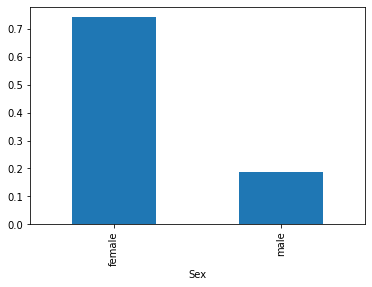

In [32]:
# 7-20 plotメソッドで棒グラフを作成する
sex['Survived'].plot(kind='bar')

In [33]:
# 7-21 モデルを再学習させる（4回目）-> エラーになる
col = ['Pclass', 'Age', 'SibSp', "Parch", 'Fare', 'Sex']
x = df2[col]
t = df2['Survived']

train_score, test_score, model = learn(x, t, depth=j)

ValueError: could not convert string to float: 'female'

In [34]:
# 7-22 get_dummies()関数で文字列を数値に変換する
# ダミー変数化（ワンホットエンコーディング）
male = pd.get_dummies(df2['Sex'], drop_first=True)
male

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [35]:
# 7-23 get_dummies(df2['Sex'], drop_first=False)の戻り値
pd.get_dummies(df2['Sex'], drop_first=False)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [36]:
# 7-24 「Embarked」列をダミー変数化する
pd.get_dummies(df2['Embarked'], drop_first=True)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [37]:
# 7-25 pd.get_dummies(df2['Embarked'], drop_first=False)
pd.get_dummies(df2['Embarked'], drop_first=False)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [38]:
# 7-26 concat()関数で2つのデータフレームを横方向に連結する
x_temp = pd.concat([x, male], axis=1)
x_temp.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,male
0,3,22.0,1,0,7.2500,male,1
1,1,38.0,1,0,71.2833,female,0
2,3,26.0,0,0,7.9250,female,0
3,1,35.0,1,0,53.1000,female,0
4,3,35.0,0,0,8.0500,male,1


In [39]:
# 7-27 pd.concat([x, x], axis=0) 縦方向の連結
tmp = pd.concat([x, x], axis=0)
tmp.shape

(1782, 6)

In [40]:
# 7-28 モデルの再学習（5回目）
x_new = x_temp.drop('Sex', axis=1)
x_new.head()

,Pclass,Age,SibSp,Parch,Fare,male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


In [41]:
for j in range(1, 6):
    train_score, test_score, model = learn(x_new, t, depth=j)
    sentence = f"訓練データの正解率{train_score} "
    sentence2 = f"テストデータの正解率{test_score}"
    total_sentence = f"深さ{j} " + sentence + sentence2
    print(total_sentence)


深さ1 訓練データの正解率0.787 テストデータの正解率0.788
深さ2 訓練データの正解率0.792 テストデータの正解率0.782
深さ3 訓練データの正解率0.847 テストデータの正解率0.81
深さ4 訓練データの正解率0.854 テストデータの正解率0.849
深さ5 訓練データの正解率0.865 テストデータの正解率0.86


In [44]:
# 7-29 学習したモデルを保存する
s1, s2, model = learn(x_new, t, depth=5)

with open('../models/survived.pkl', 'wb') as f:
    pickle.dump(model, f)

## 7.5 決定木における特徴量の考察

In [45]:
# 7-30 feature_importances_で特徴量重要度を確認する
model.feature_importances_

array([0.12084767, 0.25107251, 0.06754808, 0.00275855, 0.05145686,
       0.50631633])

In [46]:
# 7-31 特徴量重要度をデータフレームに変換して表示する
pd.DataFrame(model.feature_importances_, index=x_new.columns)

,0
Pclass,0.120848
Age,0.251073
SibSp,0.067548
Parch,0.002759
Fare,0.051457
male,0.506316


## 7.7 練習問題

In [47]:
# Ex.7-1 データの読み込み
df = pd.read_csv('../support/datafiles/ex4.csv')
print(df.head(), "\n")
print(df.tail())
df.shape

   class  dept_id  sex      score
0      3        0    1  60.170169
1      3        5    1  86.610078
2      2        6    1  69.761279
3      2        5    1  62.597242
4      0        1    0  73.777754 

     class  dept_id  sex      score
295      3        4    0  78.099285
296      4        1    0  54.043671
297      2        3    1  74.705880
298      2        2    0  60.102534
299      1        3    1  77.748665


(300, 4)

In [48]:
# Ex.7-2 男性比率の計算
df['sex'].mean()

0.5133333333333333

In [49]:
# Ex.7-3 役職ごとの「score」列の平均値を計算する
df.groupby('class').mean()['score']

class
0    68.850195
1    69.510764
2    71.611092
3    67.572909
4    68.814253
Name: score, dtype: float64

In [50]:
# 7-4 役職ごと、かつ性別ごとの「score」列の平均値を計算する
pd.pivot_table(df, index='class', columns='sex', values='score')

sex,0,1
class,,
0,68.358569,69.274011
1,67.472218,71.379432
2,71.704884,71.532109
3,63.897676,72.013815
4,69.952314,67.676191


In [51]:
# Ex.7-5 
# 「dept_id」列をダミー変数化する
#  「dept_id」列を削除して、「ダミ変数化」列を連結する
dummy = pd.get_dummies(df['dept_id'], drop_first=True)

df2 = pd.concat([df, dummy], axis=1)
df2 = df2.drop('dept_id', axis=1)
df2.head()

,class,sex,score,1,2,3,4,5,6
0,3,1,60.170169,0,0,0,0,0,0
1,3,1,86.610078,0,0,0,0,1,0
2,2,1,69.761279,0,0,0,0,0,1
3,2,1,62.597242,0,0,0,0,1,0
4,0,0,73.777754,1,0,0,0,0,0
